# Dondov, Kodovbetskyi, Korniienko group task

### Take 70% of the given dataset.

In [1]:
import pandas as pd


df = pd.read_csv("train.csv")
df = df.sample(frac=0.7, replace=False).sort_index()
df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
5,csid_6,9.007922,7.051568,0.161564,0.040997,0.191935,4.209840,3.181961,18.862680,C,BA,0
9,csid_10,13.778214,3.829299,0.159102,0.165818,0.558187,6.255980,3.315462,9.443864,B,BA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10730,csid_10731,18.793887,4.199826,0.143747,0.219525,0.267384,3.867731,2.893106,28.685574,B,BA,0
10731,csid_10732,29.094167,6.391500,-0.051283,-0.079743,0.434865,4.791949,2.244512,6.251333,B,BA,0
10734,csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0
10735,csid_10736,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA,0


### Remove Null values from a data frame, normalize data.

In [2]:
import numpy as np


cat_cols = df.columns[-3:]
num_cols = df.columns[1:-3]

for col in df.columns:
    df[col] = df[col].fillna(np.random.choice(df[col].unique()))
    
normalized_df = df.copy()
normalized_df[num_cols] = normalized_df[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.150582,0.021297,0.008225,0.122126,0.233933,0.034122,C,F,0
1,csid_2,0.353548,0.445888,0.222454,0.023724,0.007085,0.090820,0.427485,0.072752,C,A,0
3,csid_4,0.660161,0.302359,0.166653,0.023870,0.015097,0.144000,0.253921,0.021332,AA,F,0
5,csid_6,0.180560,0.429371,0.225112,0.033202,0.003290,0.091114,0.309225,0.078189,C,BA,0
9,csid_10,0.282625,0.237571,0.224320,0.041433,0.010667,0.219070,0.324834,0.040121,B,BA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10730,csid_10731,0.389940,0.259626,0.219382,0.044975,0.004810,0.069720,0.275453,0.117891,B,BA,0
10731,csid_10732,0.610325,0.390081,0.156666,0.025240,0.008183,0.127516,0.199621,0.027218,B,BA,0
10734,csid_10735,0.537126,0.396409,0.189305,0.027385,0.014031,0.166010,0.300130,0.022663,C,BA,0
10735,csid_10736,0.665584,0.473913,0.193404,0.028338,0.005832,0.177953,0.218157,0.090320,A,BA,0


### Encode categorical features as integers, remove useless column.

In [3]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
normalized_df[cat_cols] = normalized_df[cat_cols].apply(lambda x: le.fit_transform(x))
normalized_df = normalized_df.drop(["customer_id"], axis=1)

normalized_df

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.150582,0.021297,0.008225,0.122126,0.233933,0.034122,3,4,0
1,0.353548,0.445888,0.222454,0.023724,0.007085,0.090820,0.427485,0.072752,3,0,0
3,0.660161,0.302359,0.166653,0.023870,0.015097,0.144000,0.253921,0.021332,1,4,0
5,0.180560,0.429371,0.225112,0.033202,0.003290,0.091114,0.309225,0.078189,3,2,0
9,0.282625,0.237571,0.224320,0.041433,0.010667,0.219070,0.324834,0.040121,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10730,0.389940,0.259626,0.219382,0.044975,0.004810,0.069720,0.275453,0.117891,2,2,0
10731,0.610325,0.390081,0.156666,0.025240,0.008183,0.127516,0.199621,0.027218,2,2,0
10734,0.537126,0.396409,0.189305,0.027385,0.014031,0.166010,0.300130,0.022663,3,2,0
10735,0.665584,0.473913,0.193404,0.028338,0.005832,0.177953,0.218157,0.090320,0,2,0


### Resolving outliers.

In [4]:
from scipy.stats import zscore


filtered = normalized_df.copy()
filtered = filtered[(np.abs(zscore(filtered)) < 3).all(axis=1)]
filtered

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.150582,0.021297,0.008225,0.122126,0.233933,0.034122,3,4,0
1,0.353548,0.445888,0.222454,0.023724,0.007085,0.090820,0.427485,0.072752,3,0,0
3,0.660161,0.302359,0.166653,0.023870,0.015097,0.144000,0.253921,0.021332,1,4,0
5,0.180560,0.429371,0.225112,0.033202,0.003290,0.091114,0.309225,0.078189,3,2,0
9,0.282625,0.237571,0.224320,0.041433,0.010667,0.219070,0.324834,0.040121,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10728,0.517855,0.292567,0.179453,0.025876,0.010628,0.114889,0.302699,0.051236,3,0,0
10730,0.389940,0.259626,0.219382,0.044975,0.004810,0.069720,0.275453,0.117891,2,2,0
10731,0.610325,0.390081,0.156666,0.025240,0.008183,0.127516,0.199621,0.027218,2,2,0
10734,0.537126,0.396409,0.189305,0.027385,0.014031,0.166010,0.300130,0.022663,3,2,0


### Split the data into training and testing sets.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


X = filtered.copy()
X = X.drop(['customer_category'], 1)
y = filtered['customer_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Choose best parameters, where possible.

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


forest = RandomForestClassifier()
params = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 1, 2, 3, 5, 10, 15, 20, 50, 100],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

best_search = RandomizedSearchCV(forest, params)
best_search.fit(X, y)
best_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [7]:
neighbors = KNeighborsClassifier()
params = {
    'n_neighbors': [5, 10, 25, 50, 75, 100, 125, 150, 200],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [2, 5, 10, 20, 50],
    'weights': ['uniform', 'distance']
}

best_search = RandomizedSearchCV(neighbors, params)
best_search.fit(X, y)
best_search.best_params_

{'weights': 'distance',
 'n_neighbors': 5,
 'leaf_size': 5,
 'algorithm': 'kd_tree'}

In [8]:
svc = SVC()
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'probability': [True, False]
}

best_search = RandomizedSearchCV(svc, params)
best_search.fit(X, y)
best_search.best_params_

{'shrinking': False, 'probability': True, 'kernel': 'linear', 'gamma': 'scale'}

In [9]:
dectree = DecisionTreeClassifier()
params = {
    'max_depth': [None, 1, 2, 3, 5, 10, 15, 20, 50, 100],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features': ['auto', 'sqrt', 'log2']
}

best_search = RandomizedSearchCV(dectree, params)
best_search.fit(X, y)
best_search.best_params_

{'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 2}

### Compare algorithm's work results.

Accuracy:
K_Neighbors :  0.9615384615384616
Naive_Bayes :  0.9437869822485208
Decision_Tree :  0.9637573964497042
Random_Forest :  0.9718934911242604
SVC :  0.9644970414201184
Regression :  0.9585798816568047

Area under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:
K_Neighbors :  0.8785069274653626
Naive_Bayes :  0.9407530562347189
Decision_Tree :  0.8957196414017929
Random_Forest :  0.9550122249388753
SVC :  0.9536299918500407
Regression :  0.9495745721271394

Cross validation accuracy:
K_Neighbors :  0.9670118343195266
Naive_Bayes :  0.9392011834319527
Decision_Tree :  0.9705621301775148
Random_Forest :  0.9738165680473372
SVC :  0.9692307692307693
Regression :  0.9642011834319526


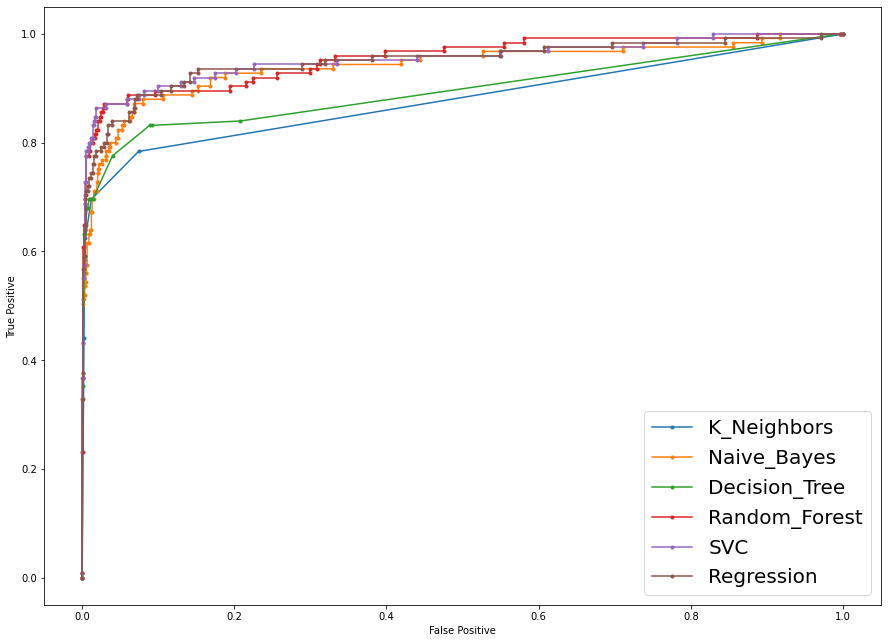

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# the set of model parameters
param_set = {
    (KNeighborsClassifier(weights='uniform', n_neighbors=5, leaf_size=5, algorithm='ball_tree'), "K_Neighbors"): [],
    (GaussianNB(), "Naive_Bayes"): [],
    (DecisionTreeClassifier(min_samples_split=8, max_features='sqrt', max_depth=5) , "Decision_Tree"): [],
    (RandomForestClassifier(n_estimators=75, min_samples_split=3, min_samples_leaf=2, max_features='sqrt', max_depth=10), "Random_Forest"): [],
    (SVC(shrinking=False, probability=True, kernel='linear', gamma='auto'), "SVC"): [],
    (LogisticRegression(), "Regression"): []
}
# metrics to apply
# (ref, name): [predict, predict_proba, roc_auc_score, roc_curve, cross_val_score]

for key, value in param_set.items():
    model = key[0]
    model.n_estimators=300
    model.min_samples_split=7
    model.min_samples_leaf=5 
    model.max_features='auto' 
    model.max_depth=5
    model.fit(X_train, y_train)
    # predict
    value.append(model.predict(X_test))
    # predict_proba
    proba = model.predict_proba(X_test)[:, 1]
    value.append(proba)
    # roc_auc_score
    value.append(metrics.roc_auc_score(y_test, proba))
    # roc_curve
    pr, tpr, threshold = metrics.roc_curve(y_test, proba)
    value.append([pr, tpr])
    # cross_val_score
    value.append(cross_val_score(model, X, y, cv=5).mean())


print("Accuracy:")
for key, value in param_set.items():
    print(key[1], ': ', metrics.accuracy_score(y_test, value[0]))

print("\nArea under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores:")
for key, value in param_set.items(): #roc_auc_score_values:
    print(key[1], ': ', value[2])
    
print("\nCross validation accuracy:")
for key, value in param_set.items():
    print(key[1], ': ', value[4])

for key, value in param_set.items():
    plt.plot(value[3][0], value[3][1], marker='.', label=key[1])

plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.rcParams['figure.figsize'] = (15, 11)
plt.rcParams['legend.fontsize'] = 20
plt.legend()
plt.show()

### Choose the best classifier.

In [13]:
ans = []
for key, value in param_set.items():
    # find arithmetical mean
    a1 = metrics.accuracy_score(y_test, value[0])
    a2 = value[4]
    a3 = value[2]
    ans.append((a1 + a2 + a3) / 3)
    
print(ans)
print('According to "accuracy", "area under the ROC curve" and "cross validation" values the best classifier is:', list(param_set)[ans.index(max(ans))][1])

[0.9356857411077836, 0.9412470739717308, 0.9433463893430041, 0.9669074280368243, 0.9624526008336428, 0.9574518790719656]
According to "accuracy", "area under the ROC curve" and "cross validation" values the best classifier is: Random_Forest
